In [1]:
%pylab
%matplotlib inline

import scipy as sp

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
store -r song_data

In [3]:
song, fs = song_data

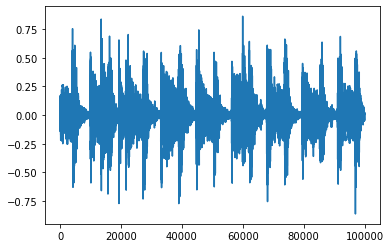

In [4]:
a = song[1000000:1100000]
plt.plot(a)

In [39]:
L = 1000
x = a
R = lambda n, k: np.sum(x[n+k:n+L-1]*x[n:n-k+L-1])

In [18]:
Rmat = R(*np.meshgrid(np.arange(100), np.arange(100)))

TypeError: only integer scalar arrays can be converted to a scalar index

In [40]:
Rmat = np.array([[R(i, j) for i in range(100)] for j in range(1000)])

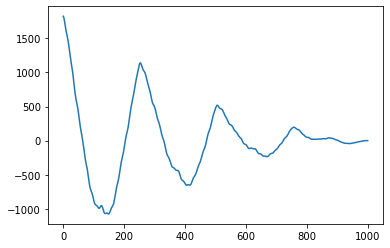

In [41]:
plt.plot(np.sum(Rmat, axis=1))

In [ ]:
n = np.arange(1000, 1010)
k = np.arange(1000,20000)
L = 50000

In [66]:
%%timeit
x = np.array([[a[i+j:i+L-1] for i in n] for j in k], dtype=object)
y = np.array([[a[i:i-j+L-1] for i in n] for j in k], dtype=object)
r = np.array([[np.dot(x[i, j], y[i, j]) for i in range(x.shape[0])] for j in range(x.shape[1])])

1.29 s ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%timeit r2 = np.array([[np.dot(a[i+j:i+L-1], a[i:i-j+L-1]) for j in k] for i in n])

1.16 s ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
x.shape, y.shape

((19000, 10), (19000, 10))

In [58]:
r = np.array([[np.dot(x[i, j], y[i, j]) for i in range(x.shape[0])] for j in range(x.shape[1])])

In [65]:
r.shape, r2.shape

((10, 19000), (10, 19000))